In [ ]:
'''
Reinforcement learning
Train machines.

The multi-armed bandit problem
A. Upper confidence bound
1. at each round n, we consider two numbers for each ad i
1.1. Ni(n) - # of times the ad was selected upto round n
1.2. Ri(n) - Sum of rewards of ad i upto  round n
2. Compute
2.1. Avg rewards of ad i upto round ri(n) = Ri(n)/Ni(n)
2.2. Confidence interval at round n di(n)= \/3log(n)/2Ni(n)
3. Select ad i with max UCB (ri(n)+din)

B. Thomson Sampling
1. At each round n consider two number for each ad i
1.1. Ni1(n) number of times ad i got reward 1 upto round i
1.1. Ni0(n) number of times ad i got reward 0 upto round i
2. For each ad i take a random draw from distribution
using Bayesian inference
theta i(n) = b(Ni1(n)+1, Ni0(n)+1)
3. select ad with highest theta i for each round
'''

In [13]:
import numpy as np
import math
import matplotlib.pyplot as plt
import pandas as pd

def plot(data):
    plt.hist(data)
    plt.title('Ads selection histogram')
    plt.xlabel('Ads')
    plt.xlabel('# times each ad was selected')
    return plt

def select_random(data):
    import random
    total_reward, ads_selected = 0, []
    ads_count = len(data.values[0,:])
    for i in range(len(data)):
        ad = random.randrange(ads_count)
        ads_selected.append(ad)
        total_reward += data.values[i, ad]
    plot(ads_selected).show()
    return ads_selected

def calc_ucb(n, reward, n_selection):
    if n_selection <= 0:
        return 1e400
    avg_r = reward / n_selection
    delta_i_n = math.sqrt(
        (3/2) * (math.log(n+1) / n_selection)
    )
    return avg_r + delta_i_n

def upper_confidence_bound(data):
    d = len(data.values[0,:])
    ads_selected = []
    n_selections, rewards = [0] * d, [0] * d
    for n in range(len(data)):
        ad,hucb = 0,0
        for i in range(d):
            ucb = calc_ucb(n, rewards[i], n_selections[i])
            if ucb > hucb:
                hucb,ad = ucb,i
        ads_selected.append(ad)
        n_selections[ad] += 1
        rewards[ad] += data.values[n, ad]
    return ads_selected, rewards

def thomson_sampling(data):
    import random
    d = len(data.values[0,:])
    ads_selected, rewards = [], [0]*d
    n_rewards = [[0]*d,[0]*d]
    for n in range(len(data)):
        ad, h_random = 0, 0
        for i in range(d):
            beta_random = random.betavariate(
                n_rewards[1][i]+1, n_rewards[0][i]+1)
            if h_random < beta_random:
                h_random,ad = beta_random,i
        ads_selected.append(ad)
        v = data.values[n, ad]
        n_rewards[v][ad] += 1
        rewards[ad] += v
    return ads_selected, rewards

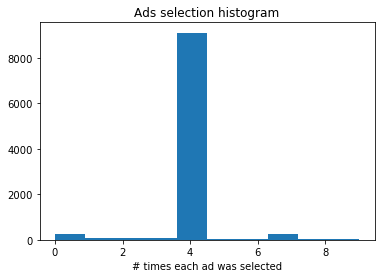

2607


In [15]:
# read data
pdir = 'Part 6 - Reinforcement Learning'
d = 'Section 32 - Upper Confidence Bound (UCB)'
fname = '/'.join([pdir, d, 'Ads_CTR_Optimisation.csv'])
dataset = pd.read_csv(fname)
# ads_selected = select_random(dataset)

#ads, rewards = upper_confidence_bound(dataset)
ads, rewards = thomson_sampling(dataset)
plot(ads).show()
print(sum(rewards))
